# MNIST Digit Classification

In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [34]:
data = pd.read_csv('train.csv')

In [35]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255
_,m_train = X_train.shape

In [75]:
Y_train

array([7, 2, 9, ..., 4, 0, 0], dtype=int64)

In [76]:
X_train.shape

(784, 41000)

In [84]:
def init_params():
    w1 = np.random.rand(10,784) -0.5
    b1 = np.random.rand(10,1) -0.5
    w2 = np.random.rand(10,10) -0.5
    b2 = np.random.rand(10,1) -0.5
    return w1,b1,w2,b2

def ReLU(Z):
    return np.maximum(Z,0)

# def softmax(Z):
#     A =  np.exp(Z)/np.sum(np.exp(Z))
#     return A

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_prop(w1,b1,w2,b2, X):
    Z1 = w1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = w2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_relu(Z):
    return Z>0

def back_prop(Z1, A1, Z2, A2,w1,w2,X, Y):
    one_hot_Y = one_hot(Y)
    m = Y.size
    dZ2 = A2 - one_hot_Y
    dw2 = (1/m)*dZ2.dot(A1.T)
    db2 = (1/m)*np.sum(dZ2)
    dZ1 = w2.T.dot(dZ2) * deriv_relu(Z1)
    dw1 = (1/m)*dZ1.dot(X.T)
    db1 = (1/m)*np.sum(dZ1)

    return dw1, db1, dw2, db2

def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1 = w1 - alpha*dw1
    b1 = b1 - alpha*db1
    w2 = w2 - alpha*dw2
    b2 = b2 - alpha*db2
    return w1,b1,w2,b2


# def init_params():
#     w1 = np.random.randn(10, 784) * 0.01
#     b1 = np.zeros((10, 1))
#     w2 = np.random.randn(10, 10) * 0.01
#     b2 = np.zeros((10, 1))
#     return w1, b1, w2, b2


# def softmax(Z):
#     expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
#     return expZ / np.sum(expZ, axis=0, keepdims=True)

# def forward_prop(w1, b1, w2, b2, X):
#     Z1 = w1.dot(X) + b1
#     A1 = ReLU(Z1)
#     Z2 = w2.dot(A1) + b2
#     A2 = softmax(Z2)
#     return Z1, A1, Z2, A2

# def one_hot(Y):
#     one_hot_Y = np.zeros((Y.size, Y.max() + 1))
#     one_hot_Y[np.arange(Y.size), Y] = 1
#     return one_hot_Y.T

# def deriv_relu(Z):
#     return Z > 0

# def back_prop(Z1, A1, Z2, A2, w1, w2, X, Y):
#     one_hot_Y = one_hot(Y)
#     m = Y.size

#     dZ2 = A2 - one_hot_Y
#     dw2 = 1/m * dZ2.dot(A1.T)
#     db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    
#     dZ1 = w2.T.dot(dZ2) * deriv_relu(Z1)
#     dw1 = 1/m * dZ1.dot(X.T)
#     db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

#     return dw1, db1, dw2, db2

# def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
#     w1 -= alpha * dw1
#     b1 -= alpha * db1
#     w2 -= alpha * dw2
#     b2 -= alpha * db2
#     return w1, b1, w2, b2

    

In [85]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions == Y)/Y.size

def gradient_descent(X,Y, iterations, alpha):
    w1, b1, w2, b2 = init_params()
    for i in range (iterations):
        Z1, A1, Z2, A2 = forward_prop(w1,b1,w2,b2, X)
        dw1, db1, dw2, db2 = back_prop(Z1, A1, Z2, A2,w1,w2,X, Y)
        w1, b1, w2, b2 = update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i%10==0:
            print("Iteration: ",i)
            print("Accuracy: ",get_accuracy(get_predictions(A2),Y))
    return w1,b1,w2,b2            
    

In [86]:
w1,b1,w2,b2 = gradient_descent(X_train,Y_train, 500, 0.1)

Iteration:  0
[6 7 7 ... 7 9 9] [7 2 9 ... 4 0 0]
Accuracy:  0.11953658536585365
Iteration:  10
[6 6 9 ... 5 2 0] [7 2 9 ... 4 0 0]
Accuracy:  0.30760975609756097
Iteration:  20
[6 6 9 ... 5 2 0] [7 2 9 ... 4 0 0]
Accuracy:  0.37926829268292683
Iteration:  30
[7 6 9 ... 5 2 0] [7 2 9 ... 4 0 0]
Accuracy:  0.4282439024390244
Iteration:  40
[7 6 9 ... 6 0 0] [7 2 9 ... 4 0 0]
Accuracy:  0.4778780487804878
Iteration:  50
[7 6 9 ... 6 0 0] [7 2 9 ... 4 0 0]
Accuracy:  0.5270243902439025
Iteration:  60
[7 6 9 ... 6 0 0] [7 2 9 ... 4 0 0]
Accuracy:  0.5705853658536585
Iteration:  70
[7 6 9 ... 4 0 0] [7 2 9 ... 4 0 0]
Accuracy:  0.6071463414634146
Iteration:  80
[7 7 9 ... 4 0 0] [7 2 9 ... 4 0 0]
Accuracy:  0.6365365853658537
Iteration:  90
[7 7 9 ... 4 0 0] [7 2 9 ... 4 0 0]
Accuracy:  0.6616829268292683
Iteration:  100
[7 7 9 ... 4 0 0] [7 2 9 ... 4 0 0]
Accuracy:  0.6825365853658537
Iteration:  110
[7 7 9 ... 4 0 0] [7 2 9 ... 4 0 0]
Accuracy:  0.7008780487804878
Iteration:  120
[7 2 9 .

In [87]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


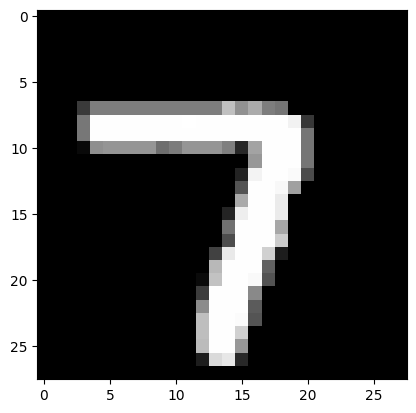

Prediction:  [2]
Label:  2


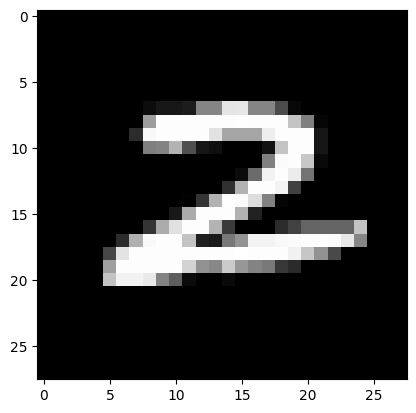

Prediction:  [9]
Label:  9


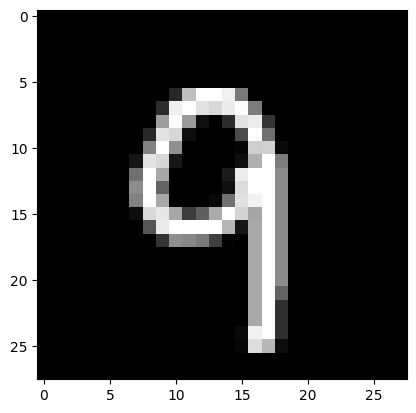

Prediction:  [9]
Label:  9


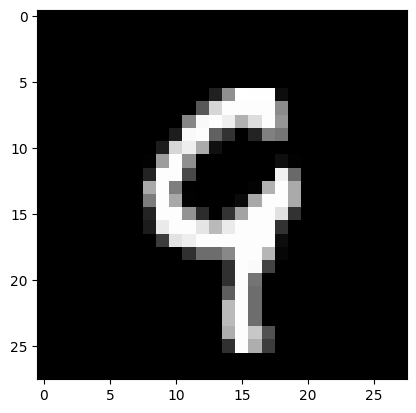

In [89]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)